# Localized modes at defects

In this section we will explore the case of the quarter wave stack when we include a defect in it (i.e. we double the thickness of low $\varepsilon$ layer).

As usual we import the modules and set plotting preferences:

In [1]:
import meep as mp
from meep import mpb
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

We fix the resolution:

In [2]:
resolution = 128

Now we fix the mediums:

In [3]:
Med_1 = mp.Medium(index=np.sqrt(13))
Med_2= mp.Medium(index=1)

Next, we set the geometry:

In [4]:
a = 1 # arbitrary units
sc_z = 10 * a  

geometry_lattice = mp.Lattice(size=mp.Vector3(0,0,sc_z))

In [5]:
w1 = 0.2 * a
w2 = 0.8 * a

center1 = (-sc_z + w1) * 0.5
center2 = center1 + (w1 + w2) * 0.5

geometry = []

for i in range(5):
    
    geometry.append(mp.Block(size=mp.Vector3(mp.inf, mp.inf, w1),
                     center=mp.Vector3(0,0,center1), material=Med_1))
    geometry.append(mp.Block(size=mp.Vector3(mp.inf, mp.inf, w2),
                     center=mp.Vector3(0,0,center2), material=Med_2))
    
    center1 = center2 + (w2 + w1)*0.5
    center2 = center1 + (w2 + w1)*0.5
    
center2 = w2*0.5
center1 = w2 + 0.5*w1
    
for i in range(5):
    
    geometry.append(mp.Block(size=mp.Vector3(mp.inf, mp.inf, w2),
                     center=mp.Vector3(0,0,center2), material=Med_2))
    geometry.append(mp.Block(size=mp.Vector3(mp.inf, mp.inf, w1),
                     center=mp.Vector3(0,0,center1), material=Med_1))
    
    center2 = center1 + (w2 + w1)*0.5
    center1 = center2 + (w2 + w1)*0.5    

We check if it makes sense:

In [6]:
sim = mp.Simulation(resolution=resolution,
                    cell_size= mp.Vector3(0,0,sc_z),
                    geometry=geometry)
sim.init_sim()
eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 1.28746e-05 s
Working in 3D dimensions.
Computational cell is 0.0078125 x 0.0078125 x 10 with resolution 128
     block, center = (0,0,-4.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,0,-4.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-3.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,0,-3.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-2.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,1

Text(0, 0.5, '$\\varepsilon$(z)')

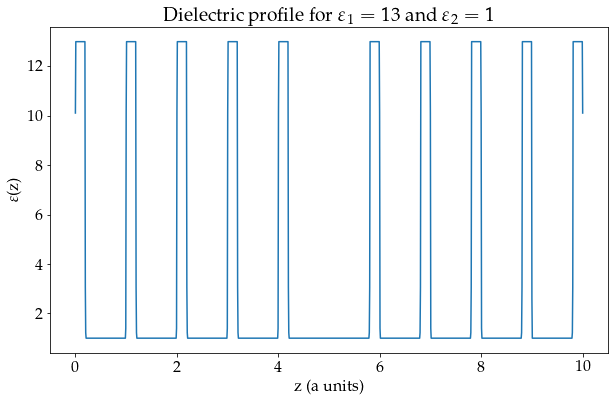

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(np.linspace(0,10,len(eps_data)),eps_data)
ax.set_title('Dielectric profile for $\\varepsilon_1=13$ and $\\varepsilon_2=1$')
ax.set_xlabel('z (a units)')
ax.set_ylabel('$\\varepsilon$(z)')

As we can see, **we doubled the width of the center layer**!

Now we set up the $k$-space:

In [9]:
num_bands = 50

k_point = 0.5

k_min = -0.05

k_max = 0.05

k_points = mp.Vector3(0,0,k_min), mp.Vector3(0,0,k_max)

We can now call the run function to compute the bands:

In [10]:
ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands);
ms.run();

Initializing eigensolver data
Computing 50 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 1280.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 10)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 0.1)
Geometric objects:
     block, center = (0,0,-4.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-4.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-3.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-3.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-2.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-2.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0),

In [11]:
efield = -np.real(np.reshape(ms.get_efield(19)[:,:,:,0],resolution*10)) # X component of field

epsilon: 1-13, mean 3.39844, harm. mean 1.23546, 21.0156% > 1, 19.987% "fill"


[]

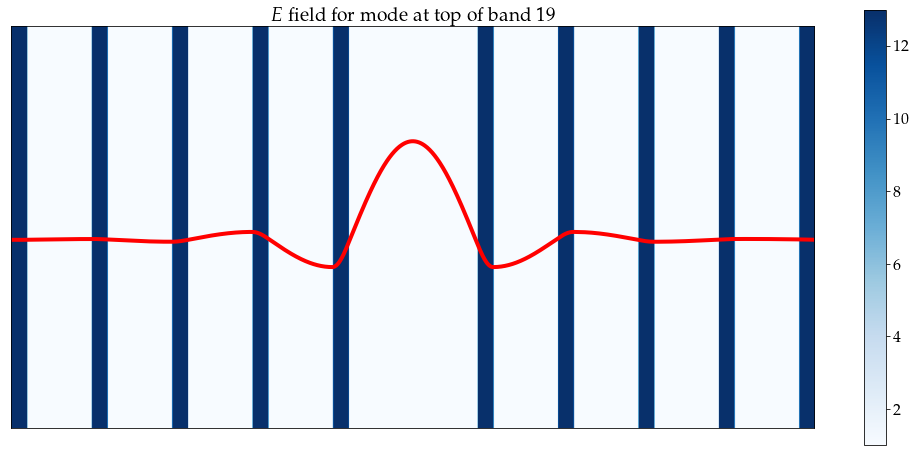

In [12]:
eps = ms.get_epsilon();

eps = np.repeat(eps[np.newaxis, :], resolution*5, axis=0)

fig, ax = plt.subplots(figsize=(18,8))
pos0 = ax.imshow(eps, cmap='Blues')
fig.colorbar(pos0,ax=ax)
ax.plot(efield*1000+300, c='r', linewidth=4)
ax.invert_yaxis()
ax.set_title('$E$ field for mode at top of band $19$')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
ax.set_xticks([])
ax.set_yticks([])

For a supercell the original bands are folded many times over, in this case, 10 times, so we need to compute many more bands to reach the same frequencies. In the `run` function ouptut we see that: `Band 19 range: 0.32`, which is the frequency corresponding to the Photonic Band Gap computed in the QWS exercise. Therefore, this state was pushed up into the gap by the defect.

In [13]:
ms.get_dfield(19)  # compute the D field for band 19
ms.compute_field_energy()  # compute the energy density from D
c = mp.Block(size=mp.Vector3(mp.inf, mp.inf, 2*w2),
                     center=mp.Vector3(0,0,0), material=Med_2)
print("Percentage of energy in defect layer: {}".format(ms.compute_energy_in_objects([c])))

D-energy-components:, 2, 19, 0.0485841, 0.951416, 0
Percentage of energy in defect layer: 0.7196613386812097


**Over 71% of the field energy in this localized region**; the field decays exponentially into the bulk crystal.

We could also have computed one band, taking into account the limits of the Photonic Band Gap in the QWS example:

In [14]:
ms.num_bands = 1  # only need to compute a single band, now!
ms.target_freq = (0.2+ 0.45) / 2
ms.tolerance = 1e-8

In [15]:
ms.run();

Initializing eigensolver data
Computing 1 bands with 1e-08 tolerance
Target frequency is 0.325
Working in 3 dimensions.
Grid size is 1 x 1 x 1280.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 10)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 0.1)
Geometric objects:
     block, center = (0,0,-4.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-4.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-3.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-3.4)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-2.9)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-2.4)
          size (1e+20,1e+20,0.8)

As expected, **we find the band and the correct range of frequencies**!